https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8

what questions do we want to answer? Where to put police stations and some sort of prediction?

Did I do the lat / long right on the x and y axis?

How do we want to break it up? The final 10 pages does not include our code right?

How do we want to clean the data?

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [31]:
my_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
print(len(my_data))
my_data.dropna(inplace=True)
print(len(my_data))

825212
8


In [32]:
my_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
all_c = list(my_data.columns)
final = []
print(len(all_c))
for i in all_c:
    if 'Crm' not in i:
        final.append(i)
final.append('Crm Cd 1')
print(len(final))

my_data.dropna(inplace=True,subset=final)
print(len(my_data))


28
23
67385


In [18]:
print(all_c)

['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']


In [21]:
my_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
10,200100509,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,2200,1,Central,192,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,15TH,OLIVE,34.0359,-118.2648
17,200506268,02/22/2020 12:00:00 AM,02/22/2020 12:00:00 AM,1900,5,Harbor,511,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,624.0,NaN,NaN,PACIFIC COAST,VERMONT,33.7926,-118.3043
19,200100535,01/14/2020 12:00:00 AM,01/14/2020 12:00:00 AM,1330,1,Central,152,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,7TH,HILL,34.0463,-118.2550
27,200100552,01/19/2020 12:00:00 AM,01/19/2020 12:00:00 AM,2000,1,Central,111,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,AA,Adult Arrest,230.0,NaN,NaN,NaN,ALAMEDA,LOS ANGELES,34.0578,-118.2371
34,200100568,01/27/2020 12:00:00 AM,01/27/2020 12:00:00 AM,1500,1,Central,166,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,998.0,NaN,NaN,6TH,SAN JULIAN,34.0428,-118.2461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825103,230616011,10/03/2023 12:00:00 AM,10/03/2023 12:00:00 AM,1055,6,Hollywood,657,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,AA,Adult Arrest,230.0,998.0,NaN,NaN,VAN NESS,SANTA MONICA,34.0907,-118.3157
825114,230311153,05/20/2023 12:00:00 AM,05/20/2023 12:00:00 AM,1820,3,Southwest,356,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,WESTERN AV,JEFFERSON BL,34.0256,-118.3089
825127,231814456,08/02/2023 12:00:00 AM,07/28/2023 12:00:00 AM,2330,18,Southeast,1823,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,IC,Invest Cont,626.0,NaN,NaN,NaN,SAN PEDRO ST,CENTURY BL,33.9456,-118.2695
825163,232004024,01/01/2023 12:00:00 AM,01/01/2023 12:00:00 AM,1130,20,Olympic,2029,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,WILSHIRE BL,VERMONT AV,34.0618,-118.2917


(-119.0, -118.0)

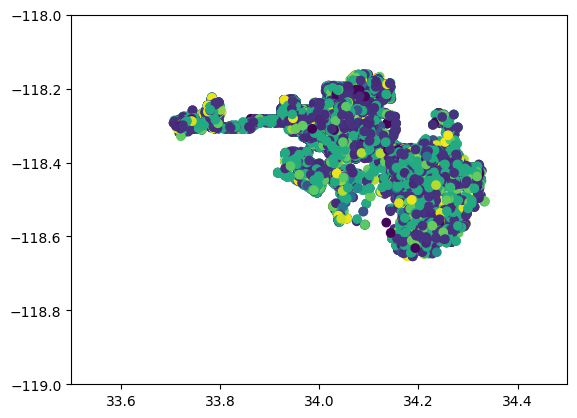

In [22]:
location = my_data[['Crm Cd','LAT','LON']]
plt.scatter(location['LAT'],location['LON'],c=location['Crm Cd'])
plt.xlim((33.5,34.5))
plt.ylim((-119,-118))

In [23]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, normalize=False, p=2):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
        """
        self.n_clusters = n_clusters #initialize everything
        self.max_iter = max_iter
        self.tol = tol
        self.p = p
        self.normalize = normalize        # This is for Problem 3.
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        #set our centers and then normalize if we need to 
        self.centers = X[np.random.choice(X.shape[0],self.n_clusters,replace=False)]
        if self.normalize == True:
            self.centers = np.reshape(self.centers/np.linalg.norm(self.centers,axis=1),(-1,1))
        for i in range(0,self.max_iter): #iterate thorugh max iter and create the label and new center
                label = np.argmin(np.linalg.norm(X[:,np.newaxis]-self.centers,ord=self.p,axis=2),axis=1)
                new_c = np.array([X[label==z].mean(axis=0) for z in range(self.n_clusters)])
                if np.linalg.norm(new_c-self.centers,ord=self.p) <self.tol: #if error is less than tol break
                     break
                self.centers = new_c #set the new center and normalize 
                if self.normalize == True:
                    self.centers = np.reshape(self.centers/np.linalg.norm(self.centers,axis=1),(-1,1))
        return self #return it 
    
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters for each entry of X.
        """
        my_dist = np.linalg.norm(X[:,np.newaxis]-self.centers,ord=self.p,axis=2) #make our distance and return the argmin of it
        return np.argmin(my_dist,axis=1)
    
    def fit_predict(self, X):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        return self.fit(X).predict(X)
    
    def plot(self, X, y):
        """Plot each of the data points, colored by cluster.
        Plot each of the cluster centers using a different marker.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data being clustered.
            y ((n_samples) ndarray): the labels for each of the samples.
        """
        
        #plot the points and then the centers and label everything
        plt.scatter(X[:,0],X[:,1],c=y)
        plt.scatter(self.centers[:,0],self.centers[:,1],marker='+',color='black')
        plt.xlabel('X Label')
        plt.ylabel('Y Label')
        plt.title('Cluster Plot')
        plt.show()

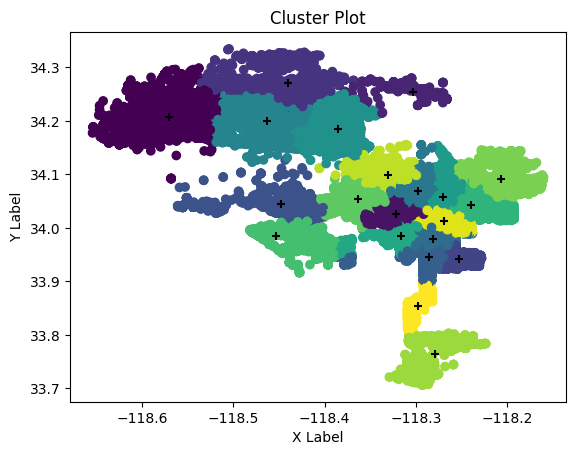

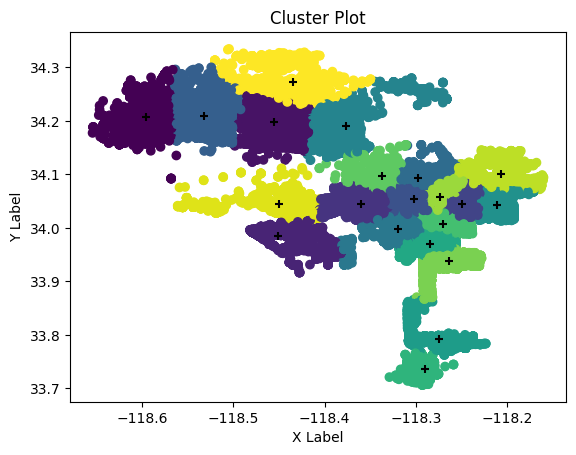

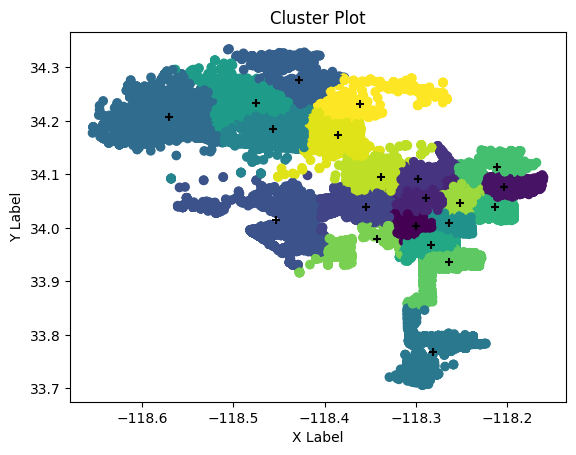

In [38]:
location = my_data[['LON','LAT']]
new_loc = location[~(location == 0).all(axis=1)]
# new_loc
new_data = new_loc[['LON','LAT']].values
# new_data
for x in [1,2,np.inf]: #iterate through our different norms 
    km = KMeans(n_clusters=21,p=x) #initialize our class, fit it and then predict and plot it 
    km.fit(new_data)
    y = km.predict(new_data)
    km.plot(new_data,y)